In [281]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 8.11 μs


## Data Cleaning

In [282]:
df = pd.read_csv("../data/merged_data_cleaned.csv")
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


We have a lot of columns with data that are irrelevant for our analysis. We'll drop them to reduce dimensionality of the dataset

In [283]:
df = df.drop(["Unnamed: 0", "Farm.Name", "Lot.Number", "Mill", "ICO.Number", 'Number.of.Bags', 'Region', 'Bag.Weight', 'In.Country.Partner', 'Grading.Date', 'Owner', 'Certification.Body', 'Certification.Address', 'Certification.Contact', 'Expiration', 'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters', 'Owner.1', 'Altitude', 'Producer', 'Company', 'Harvest.Year'], axis=1)


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1339 non-null   object 
 1   Country.of.Origin     1338 non-null   object 
 2   Variety               1113 non-null   object 
 3   Processing.Method     1169 non-null   object 
 4   Aroma                 1339 non-null   float64
 5   Flavor                1339 non-null   float64
 6   Aftertaste            1339 non-null   float64
 7   Acidity               1339 non-null   float64
 8   Body                  1339 non-null   float64
 9   Balance               1339 non-null   float64
 10  Uniformity            1339 non-null   float64
 11  Clean.Cup             1339 non-null   float64
 12  Sweetness             1339 non-null   float64
 13  Cupper.Points         1339 non-null   float64
 14  Total.Cup.Points      1339 non-null   float64
 15  Moisture             

In [285]:
df.isna().sum()

Species                   0
Country.of.Origin         1
Variety                 226
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   270
Category.Two.Defects      0
altitude_mean_meters    230
dtype: int64

We replace rows with a lot of missing nominal data with the mode of the column, to retain the variance of the rest of the row data

In [286]:
df = df.fillna({'Variety': df['Variety'].mode()[0]})
df = df.fillna({'Processing.Method': df['Processing.Method'].mode()[0]})
df = df.fillna({'Color': df['Color'].mode()[0]})

We drop the rows with a single row missing nominal data. Especially "Country of Origin", since we can not just put in a mode value, since it might create significant wrong data

In [287]:
df = df.dropna(how='any')

In [288]:
df.isna().sum()

Species                 0
Country.of.Origin       0
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Category.One.Defects    0
Quakers                 0
Color                   0
Category.Two.Defects    0
altitude_mean_meters    0
dtype: int64

No more missing values!

#### Outliers

In [289]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,7.570569,7.52056,7.394269,7.528953,7.506670,7.505542,9.867753,9.851300,9.873637,7.488845,82.108339,0.092031,0.367329,0.138989,3.537004,1775.053136
std,0.383837,0.40059,0.405867,0.386075,0.366717,0.419311,0.521324,0.783232,0.601237,0.470300,3.603813,0.045508,1.849216,0.724208,5.272646,8672.540532
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.33000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.100000,0.000000,0.000000,0.000000,1100.000000
50%,7.580000,7.58000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.75000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000
max,8.750000,8.83000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.200000,31.000000,11.000000,47.000000,190164.000000


We have some columns with very high standard deviations

<Axes: >

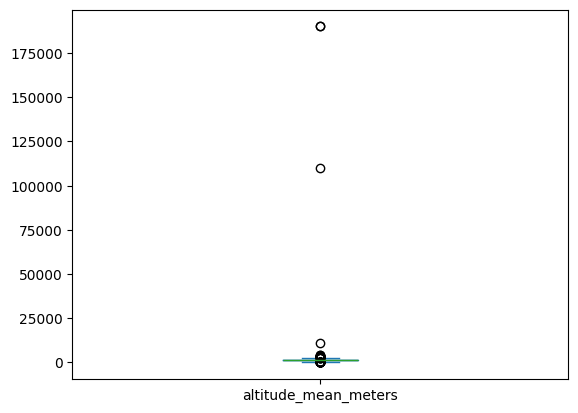

In [290]:
fig = plt.figure()
df.altitude_mean_meters.plot.box()

The column contains significant outliers. Since its only a couple of rows, we'll drop them

In [291]:
# We'll remove the outlying rows based on z-score
df = df[np.abs(zscore(df['altitude_mean_meters'])) < 1]

In [292]:
df

,Species,Country.of.Origin,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_mean_meters
0,Arabica,Ethiopia,Caturra,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,...,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,2075.0
1,Arabica,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,...,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,2075.0
2,Arabica,Guatemala,Bourbon,Washed / Wet,8.42,8.50,8.42,8.42,8.33,8.42,...,10.00,10.00,9.25,89.75,0.00,0,0.0,Green,0,1700.0
3,Arabica,Ethiopia,Caturra,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,...,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,2000.0
4,Arabica,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,...,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,Robusta,India,Caturra,Washed / Wet,7.67,7.67,7.50,7.33,7.58,7.50,...,10.00,7.42,7.50,80.17,0.00,0,0.0,Bluish-Green,1,750.0
1332,Robusta,India,Caturra,Natural / Dry,7.58,7.42,7.42,7.83,7.42,7.50,...,10.00,7.42,7.58,80.17,0.00,0,0.0,Green,0,750.0
1333,Robusta,United States,Arusha,Natural / Dry,7.92,7.50,7.42,7.42,7.42,7.42,...,10.00,7.58,7.33,79.33,0.00,0,0.0,Green,0,3000.0
1335,Robusta,Ecuador,Caturra,Washed / Wet,7.50,7.67,7.75,7.75,5.17,5.25,...,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,40.0


<Axes: >

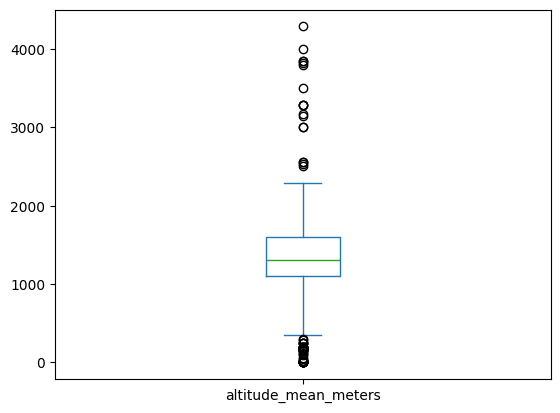

In [293]:
df.altitude_mean_meters.plot.box()

<Axes: >

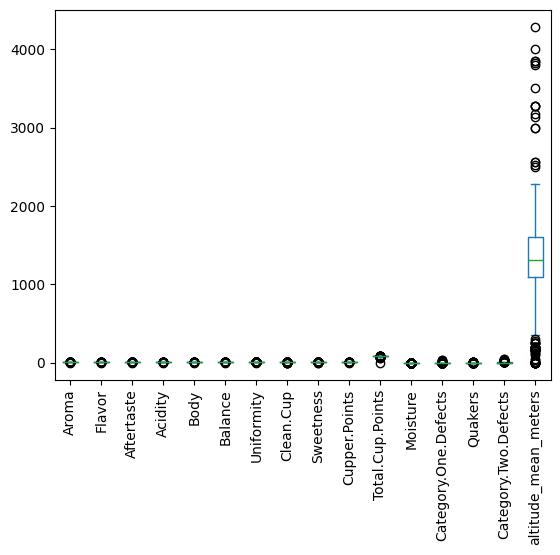

In [294]:
df.plot.box(rot=90)

Even after removing the worst outliers, the mean altitude still distributes over large values. We'll exclude it in the plot to dentify other problematic features

<Axes: >

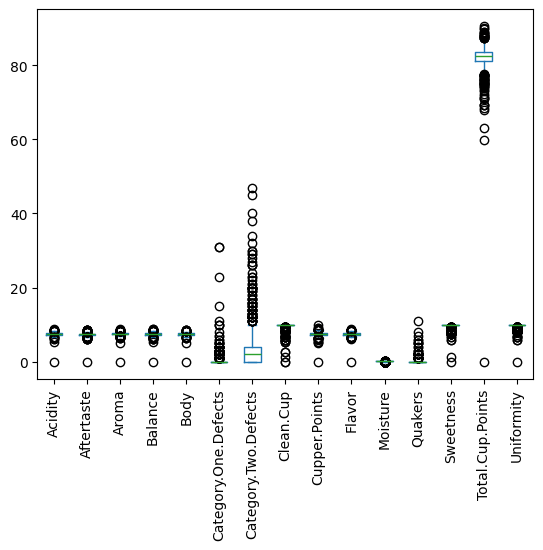

In [295]:
df[df.columns.difference(['altitude_mean_meters'])].plot.box(rot=90)

It seems a lot of the features contain unnatural zero-values. We'll replace the zero values, with the median of the feature

In [296]:
df['Acidity'] = df['Acidity'].replace(0, df['Acidity'].median())
df['Aftertaste'] = df['Aftertaste'].replace(0, df['Aftertaste'].median())
df['Aroma'] = df['Aroma'].replace(0, df['Aroma'].median())
df['Balance'] = df['Balance'].replace(0, df['Balance'].median())
df['Body'] = df['Body'].replace(0, df['Body'].median())
df['Clean.Cup'] = df['Clean.Cup'].replace(0, df['Clean.Cup'].median())
df['Cupper.Points'] = df['Cupper.Points'].replace(0, df['Cupper.Points'].median())
df['Flavor'] = df['Flavor'].replace(0, df['Flavor'].median())
df['Moisture'] = df['Moisture'].replace(0, df['Moisture'].median())
df['Sweetness'] = df['Sweetness'].replace(0, df['Sweetness'].median())
df['Uniformity'] = df['Uniformity'].replace(0, df['Uniformity'].median())

Except the Total cup points. We'll drop the row since it is our target value, and an unnatural zero might mess with correlations

In [297]:
df = df[df['Total.Cup.Points'] != 0]

<Axes: >

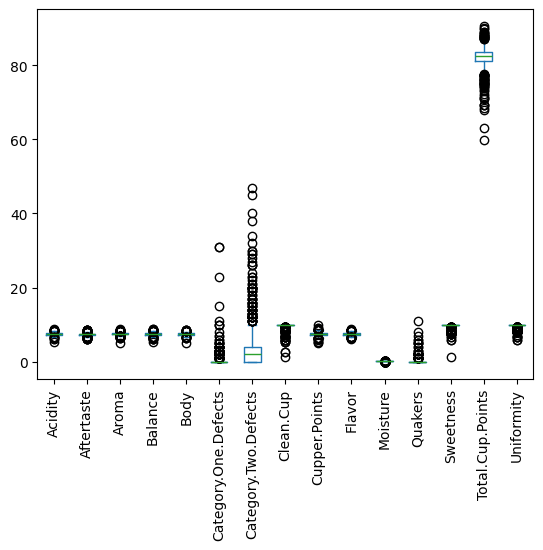

In [298]:
df[df.columns.difference(['altitude_mean_meters'])].plot.box(rot=90)

In [299]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,7.578368,7.527824,7.401496,7.535739,7.513654,7.512665,9.876827,9.869365,9.882738,7.496047,82.185893,0.110879,0.368994,0.135993,3.531278,1327.317203
std,0.309181,0.331268,0.340065,0.313192,0.289467,0.354021,0.429254,0.662942,0.523704,0.413674,2.629645,0.017823,1.853241,0.716414,5.269219,486.627223
min,5.080000,6.170000,6.170000,5.250000,5.170000,5.250000,6.000000,1.330000,1.330000,5.170000,59.830000,0.010000,0.000000,0.000000,0.000000,1.000000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.210000,0.110000,0.000000,0.000000,0.000000,1100.000000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.580000,0.120000,0.000000,0.000000,4.000000,1600.000000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.200000,31.000000,11.000000,47.000000,4287.000000


In [300]:
df.to_csv('cleaned_dataset_no_zeros.csv', index=False)

The datset is now ready for analysis!